In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/data-mining/* ./

In [ ]:
PRODUCTINSTANCE_REAL = pd.read_csv('PRODUCTINSTANCE.csv', encoding='cp1258', low_memory=False)

#Utils

In [ ]:
def common_member(a, b):
    return np.nonzero(np.isin(a, b))[0]

In [ ]:
def find_duplicates(mylist):
  return list({x for x in mylist if mylist.count(x) > 1})

In [ ]:
def get_values(source,target, prime_values, elements, sum_of_value, max_values, min_values):

  for c in target:
    common_index = common_member(source , c)
    count_of_values = 0
    all_values = []
    for i in range(len(common_index)):
      index = common_index[i]
      if not pd.isnull(prime_values[index]) and prime_values[index] != 'N':
        x = prime_values[index]
        count_of_values += float(x)
      else:
        x = np.nan
      all_values.append(x)
    data = np.array(all_values, dtype=np.float64)

    elements.append(c)
    sum_of_value.append(count_of_values)
    max_values.append(np.max(data))
    min_values.append(np.min(data))

In [ ]:
def get_year(source,target, years, elements,specific_year, prime_values, sum_of_value):

  for c in target:
    common_index = common_member(source , c)
    all_years = []
    count_of_values = 0
    for i in range(len(common_index)):
      index = common_index[i]
      if not pd.isnull(prime_values[index]) and prime_values[index] != 'N':
        count_of_values += float(prime_values[index])
      all_years.append(years[index])
    elements.append(c)
    # most frequent year
    specific_year.append(np.bincount(all_years).argmax())
    sum_of_value.append(count_of_values)

In [ ]:
def find_extermum(elements, sum_of_values):
  maximum_value = np.max(sum_of_values)
  minimum_value = np.min(sum_of_values)

  id_of_max = 0
  id_of_min = 0

  for i in range(len(sum_of_values)):
    if  sum_of_values[i] == maximum_value:
      id_of_max = elements[i]
    elif sum_of_values[i] == minimum_value:
      id_of_min = elements[i]

  return  id_of_max , maximum_value, id_of_min, minimum_value

#Question 1

##PRODUCTINSTANCE table

###BASEINFO_RECORDID

In [ ]:
PRODUCTINSTANCE = PRODUCTINSTANCE_REAL.copy(True)

# Remove null BASEINFO_RECORDID rows from table
PRODUCTINSTANCE.dropna(subset=['BASEINFO_RECORDID'], inplace=True)
PRODUCTINSTANCE = PRODUCTINSTANCE.reset_index(drop=True)

# Filter irregular type of records by regular-expressions
PRODUCTINSTANCE = PRODUCTINSTANCE.astype({'BASEINFO_RECORDID': str})
PRODUCTINSTANCE = PRODUCTINSTANCE[PRODUCTINSTANCE['BASEINFO_RECORDID'].str.contains('^[0-9]+\.?\d*$')]
PRODUCTINSTANCE = PRODUCTINSTANCE.astype({'BASEINFO_RECORDID': float})

In [ ]:
# Extract related columns from table
BASEINFO_RECORDID = PRODUCTINSTANCE.loc[:,'BASEINFO_RECORDID']
PRIMALVALUE = PRODUCTINSTANCE.loc[:,'PRIMALVALUE']

BASEINFO_RECORDID_NEW = list(BASEINFO_RECORDID)
values = list(PRIMALVALUE)

In [ ]:
duplicates = find_duplicates(BASEINFO_RECORDID_NEW)
non_duplicates = []
for i in range(len(BASEINFO_RECORDID_NEW)):
  if BASEINFO_RECORDID_NEW[i] not in duplicates:
    non_duplicates.append(BASEINFO_RECORDID_NEW[i])

In [ ]:
BASEINFO_RECORDID_all=[]
sum_of_values=[]
max_values = []
min_values = []

In [ ]:
get_values(BASEINFO_RECORDID_NEW, duplicates, values, BASEINFO_RECORDID_all, sum_of_values,max_values, min_values)
get_values(BASEINFO_RECORDID_NEW, non_duplicates, values, BASEINFO_RECORDID_all, sum_of_values,max_values, min_values)

In [ ]:
df = pd.DataFrame({
    'BASEINFO_RECORDID': BASEINFO_RECORDID_all,
    'maximum value': np.nanmax(max_values),
    'minimum value': np.nanmin(min_values),
    'sum of values': sum_of_values
})

df.set_index('BASEINFO_RECORDID')

,maximum value,minimum value,sum of values
BASEINFO_RECORDID,,,
1.0,1.954043e+10,0.0,0.0
8200.0,1.954043e+10,0.0,0.0
8203.0,1.954043e+10,0.0,0.0
8204.0,1.954043e+10,0.0,0.0
8205.0,1.954043e+10,0.0,0.0
...,...,...,...
469638478.0,1.954043e+10,0.0,233260000.0
469638518.0,1.954043e+10,0.0,17549000.0
469638640.0,1.954043e+10,0.0,7400000.0


In [ ]:
id_of_max , maximum_value, id_of_min, minimum_value  = find_extermum(BASEINFO_RECORDID_all, sum_of_values)

print(f'The maximum sum_of_values is = {maximum_value} from BASEINFO_RECORDID = {id_of_max}')
print(f'The minimum sum_of_values is = {minimum_value} from BASEINFO_RECORDID = {id_of_min}')

The maximum sum_of_values is = 338158307032.0 from BASEINFO_RECORDID = 469638651.0
The minimum sum_of_values is = 0.0 from BASEINFO_RECORDID = 7722.0


###COSTCENTER_ID

In [ ]:
PRODUCTINSTANCE = PRODUCTINSTANCE_REAL.copy(True)

# Remove all null COSTCENTER_ID rows from table
PRODUCTINSTANCE.dropna(subset=['C_COSTCENTER_ID'], inplace=True)

# Filter irregular type of records by regular-expressions
PRODUCTINSTANCE = PRODUCTINSTANCE.astype({'C_COSTCENTER_ID': str})
PRODUCTINSTANCE = PRODUCTINSTANCE[PRODUCTINSTANCE['C_COSTCENTER_ID'].str.contains('^[0-9]+\.?\d*$')]
PRODUCTINSTANCE = PRODUCTINSTANCE.astype({'C_COSTCENTER_ID': float})

PRODUCTINSTANCE = PRODUCTINSTANCE.reset_index(drop=True)

In [ ]:
# Extract related columns from table
C_COSTCENTER_ID = PRODUCTINSTANCE.loc[:,'C_COSTCENTER_ID']
PRIMALVALUE = PRODUCTINSTANCE.loc[:,'PRIMALVALUE']

C_COSTCENTER_ID_NEW = list(C_COSTCENTER_ID)
values = list(PRIMALVALUE)

In [ ]:
duplicates_cost_center = find_duplicates(C_COSTCENTER_ID_NEW)
non_duplicates_cost_center = []
for i in range(len(C_COSTCENTER_ID_NEW)):
  if C_COSTCENTER_ID_NEW[i] not in duplicates_cost_center:
    non_duplicates_cost_center.append(C_COSTCENTER_ID_NEW[i])

In [ ]:
# Calculate sum_of_values for each cost_center with the max and min amount for them
C_COSTCENTER_ID_all=[]
sum_of_values_costcenter=[]
max_values_C = []
min_values_C = []

get_values(C_COSTCENTER_ID_NEW, duplicates_cost_center, values, C_COSTCENTER_ID_all, sum_of_values_costcenter, max_values_C, min_values_C)
get_values(C_COSTCENTER_ID_NEW, non_duplicates_cost_center, values, C_COSTCENTER_ID_all, sum_of_values_costcenter, max_values_C, min_values_C)

In [ ]:
df = pd.DataFrame({
    'COSTCENTER_ID': C_COSTCENTER_ID_all,
    'maximum value': np.nanmax(max_values_C),
    'minimum value': np.nanmin(min_values_C),
    'sum of values': sum_of_values_costcenter
})

df.set_index('COSTCENTER_ID')

,maximum value,minimum value,sum of values
COSTCENTER_ID,,,
0.0,1.917681e+10,0.0,0.000000e+00
210032641.0,1.917681e+10,0.0,3.477972e+07
265166850.0,1.917681e+10,0.0,5.874420e+09
3.0,1.917681e+10,0.0,0.000000e+00
4.0,1.917681e+10,0.0,0.000000e+00
...,...,...,...
36.0,1.917681e+10,0.0,0.000000e+00
25.0,1.917681e+10,0.0,0.000000e+00
19.0,1.917681e+10,0.0,0.000000e+00


In [ ]:
id_of_max , maximum_value, id_of_min, minimum_value  = find_extermum(C_COSTCENTER_ID_all, sum_of_values_costcenter)

print(f'The maximum sum_of_values is = {maximum_value} from COSTCENTER_ID = {id_of_max}')
print(f'The minimum sum_of_values is = {minimum_value} from COSTCENTER_ID = {id_of_min}')

The maximum sum_of_values is = 109047593567.0 from COSTCENTER_ID = 210032638.0
The minimum sum_of_values is = 0.0 from COSTCENTER_ID = 20.0


###During time

In [ ]:
PRODUCTINSTANCE_Y = PRODUCTINSTANCE_REAL.copy(True)

# Filter irregular type of records by regular-expressions
PRODUCTINSTANCE_Y = PRODUCTINSTANCE_Y.astype({'CREATED': str})
PRODUCTINSTANCE_Y = PRODUCTINSTANCE_Y[PRODUCTINSTANCE_Y['CREATED'].str.contains('(\d{1,2})\/(\d{1,2})\/(\d{4}) (\d{1,2}):(\d{1,2})')]
PRODUCTINSTANCE_Y = PRODUCTINSTANCE_Y.reset_index(drop=True)

<ipython-input-27-e0304a22a61b>:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  PRODUCTINSTANCE_Y = PRODUCTINSTANCE_Y[PRODUCTINSTANCE_Y['CREATED'].str.contains('(\d{1,2})\/(\d{1,2})\/(\d{4}) (\d{1,2}):(\d{1,2})')]


####BASEINFO_RECORDID

In [ ]:
PRODUCTINSTANCE_TABLE = PRODUCTINSTANCE_Y.copy(True)
PRODUCTINSTANCE_TABLE.dropna(subset=['BASEINFO_RECORDID'], inplace=True)

PRODUCTINSTANCE_TABLE = PRODUCTINSTANCE_TABLE.astype({'BASEINFO_RECORDID': str})
PRODUCTINSTANCE_TABLE = PRODUCTINSTANCE_TABLE[PRODUCTINSTANCE_TABLE['BASEINFO_RECORDID'].str.contains('^[0-9]+\.?\d*$')]
PRODUCTINSTANCE_TABLE = PRODUCTINSTANCE_TABLE.astype({'BASEINFO_RECORDID': float})
PRODUCTINSTANCE_TABLE = PRODUCTINSTANCE_TABLE.reset_index(drop=True)

CREATED = PRODUCTINSTANCE_TABLE.loc[:,'CREATED']
BASEINFO_RECORDID_NEW_Y = list(PRODUCTINSTANCE_TABLE.loc[:,'BASEINFO_RECORDID'])
values_Y = list(PRODUCTINSTANCE_TABLE.loc[:,'PRIMALVALUE'])

In [ ]:
years = []
for i in range(len(CREATED)):
  y = pd.to_datetime(CREATED[i], format='%m/%d/%Y %H:%M').year
  years.append(y)

In [ ]:
specific_years = []
BASEINFO_RECORDIDs = []
sum = []

get_year(BASEINFO_RECORDID_NEW_Y, duplicates, years, BASEINFO_RECORDIDs, specific_years, values_Y, sum)
get_year(BASEINFO_RECORDID_NEW_Y, non_duplicates, years, BASEINFO_RECORDIDs, specific_years, values_Y, sum)

In [ ]:
df = pd.DataFrame({
    'BASEINFO_RECORDID': BASEINFO_RECORDIDs,
    'sum of values': sum,
    'frequent financial_year': specific_years
})

df.set_index('BASEINFO_RECORDID')

,sum of values,frequent financial_year
BASEINFO_RECORDID,,
1.0,0.0,2019
8200.0,0.0,2014
8203.0,0.0,2019
8204.0,0.0,2014
8205.0,0.0,2014
...,...,...
469638478.0,233260000.0,2021
469638518.0,17549000.0,2021
469638640.0,7400000.0,2022


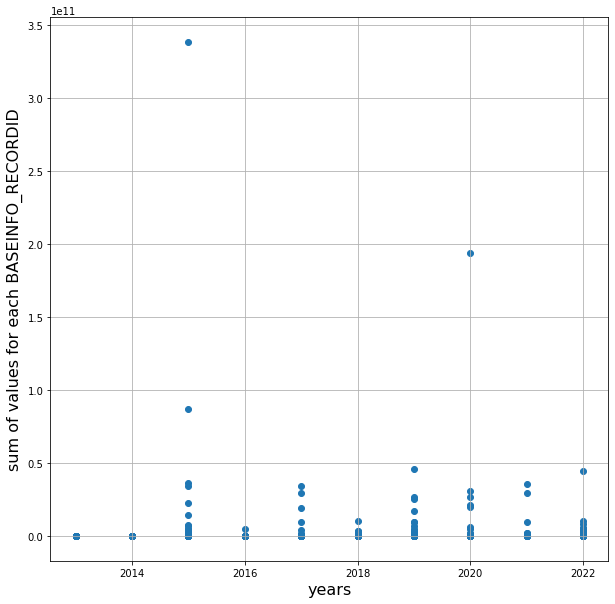

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(specific_years, sum)
plt.xlabel('years', fontsize=16)
plt.ylabel('sum of values for each BASEINFO_RECORDID', fontsize=16)
plt.grid()
plt.show()

####COSTCENTER_ID

In [ ]:
PRODUCTINSTANCE_TABLE = PRODUCTINSTANCE_Y.copy(True)
PRODUCTINSTANCE_TABLE.dropna(subset=['C_COSTCENTER_ID'], inplace=True)

PRODUCTINSTANCE_TABLE = PRODUCTINSTANCE_TABLE.astype({'C_COSTCENTER_ID': str})
PRODUCTINSTANCE_TABLE = PRODUCTINSTANCE_TABLE[PRODUCTINSTANCE_TABLE['C_COSTCENTER_ID'].str.contains('^[0-9]+\.?\d*$')]
PRODUCTINSTANCE_TABLE = PRODUCTINSTANCE_TABLE.astype({'C_COSTCENTER_ID': float})
PRODUCTINSTANCE_TABLE = PRODUCTINSTANCE_TABLE.reset_index(drop=True)

CREATED = PRODUCTINSTANCE_TABLE.loc[:,'CREATED']
C_COSTCENTER_ID_NEW_Y = list(PRODUCTINSTANCE_TABLE.loc[:,'C_COSTCENTER_ID'])
values_Y = list(PRODUCTINSTANCE_TABLE.loc[:,'PRIMALVALUE'])

In [ ]:
years = []
for i in range(len(CREATED)):
  y = pd.to_datetime(CREATED[i], format='%m/%d/%Y %H:%M').year
  years.append(y)

In [ ]:
specific_years = []
COSTCENTER_IDs = []
sum = []

get_year(C_COSTCENTER_ID_NEW_Y, duplicates_cost_center, years, COSTCENTER_IDs, specific_years, values_Y, sum)
get_year(C_COSTCENTER_ID_NEW_Y, non_duplicates_cost_center, years, COSTCENTER_IDs, specific_years, values_Y, sum)

In [ ]:
df = pd.DataFrame({
    'C_COSTCENTER_ID': COSTCENTER_IDs,
    'sum of values': sum,
    'frequent financial_year': specific_years
})

df.set_index('C_COSTCENTER_ID')

,sum of values,frequent financial_year
C_COSTCENTER_ID,,
210032641.0,3.477972e+07,2015
265166850.0,5.874420e+09,2015
210032643.0,2.273541e+08,2015
210032644.0,2.944007e+08,2015
210032642.0,8.299850e+07,2015
...,...,...
469638213.0,6.055000e+06,2018
1901.0,2.500000e+06,2019
469638204.0,3.650000e+06,2019


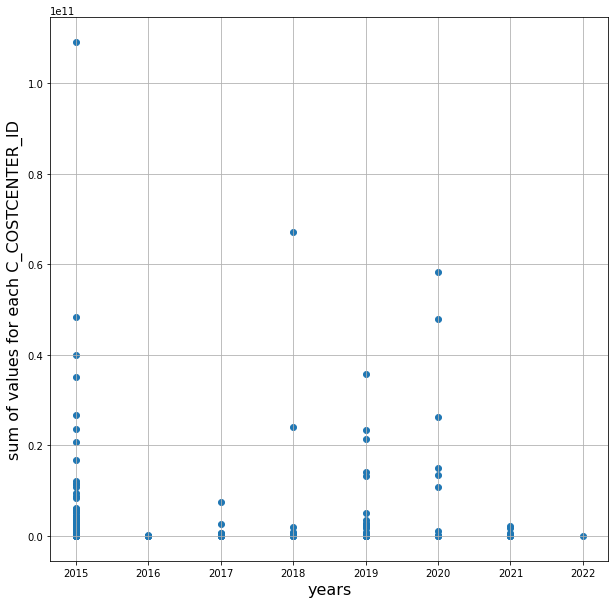

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(specific_years, sum)
plt.xlabel('years', fontsize=16)
plt.ylabel('sum of values for each C_COSTCENTER_ID', fontsize=16)
plt.grid()
plt.show()